In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx 
Continuous=pd.read_csv('C:/Users/SUBHROJIT_PC/Desktop/96-DSP212-190022-Information Visualisation Laboratory/ContinousDataset.csv')

In [11]:
Continuous.head(5)

,Unnamed: 0,Scorecard,Team 1,Team 2,Margin,Ground,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
0,0,ODI # 1,Australia,England,Winner2ndInning,Melbourne,5-Jan-71,Australia,Australia,Home,Away,Second,First
1,1,ODI # 2,England,Australia,Winner2ndInning,Manchester,24-Aug-72,England,England,Home,Away,Second,First
2,2,ODI # 3,England,Australia,Winner2ndInning,Lord's,26-Aug-72,Australia,England,Home,Away,First,Second
3,3,ODI # 4,England,Australia,Winner2ndInning,Birmingham,28-Aug-72,England,England,Home,Away,Second,First
4,4,ODI # 5,New Zealand,Pakistan,Winner1stInning,Christchurch,11-Feb-73,New Zealand,New Zealand,Home,Away,First,Second


In [12]:
Continuous.loc[(Continuous["Match Date"] == "Jan 5, 1971"),:] 

,Unnamed: 0,Scorecard,Team 1,Team 2,Margin,Ground,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2


In [9]:
Continuous.head(5)

,Unnamed: 0,Scorecard,Team 1,Team 2,Margin,Ground,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
0,0,ODI # 1,Australia,England,Winner2ndInning,Melbourne,5-Jan-71,Australia,Australia,Home,Away,Second,First
1,1,ODI # 2,England,Australia,Winner2ndInning,Manchester,24-Aug-72,England,England,Home,Away,Second,First
2,2,ODI # 3,England,Australia,Winner2ndInning,Lord's,26-Aug-72,Australia,England,Home,Away,First,Second
3,3,ODI # 4,England,Australia,Winner2ndInning,Birmingham,28-Aug-72,England,England,Home,Away,Second,First
4,4,ODI # 5,New Zealand,Pakistan,Winner1stInning,Christchurch,11-Feb-73,New Zealand,New Zealand,Home,Away,First,Second


In [13]:
def hwin(s):
      if (s['Winner'] == s['Team 1']  and s['Venue_Team1'] == "Home"):
              return s['Team 1']
      elif (s['Winner'] == s['Team 2']  and s['Venue_Team2'] == "Home"):
              return s['Team 2']              
      else :
          return np.nan

def awin(s):
      if (s['Winner'] == s['Team 1']  and s['Venue_Team1'] in( "Away",'Neutral')):
              return s['Team 1']
      elif (s['Winner'] == s['Team 2']  and s['Venue_Team2'] in( "Away",'Neutral')):
              return s['Team 2']
              
      else :
          return np.nan

def hloss(s):
      if (s['Winner'] != s['Team 1']  and s['Venue_Team1'] == "Home"):
              return s['Team 1']
      elif (s['Winner'] != s['Team 2']  and s['Venue_Team2'] == "Home"):
              return s['Team 2']
              
      else :
          return np.nan

def aloss(s):
      if (s['Winner'] != s['Team 1']  and s['Venue_Team1'] in( "Away",'Neutral')):
              return s['Team 1']
      elif (s['Winner'] != s['Team 2']  and s['Venue_Team2'] in( "Away",'Neutral')):
              return s['Team 2']          
      else :
          return np.nan
        
def FirstInningsWinner(s):
      if (s['Winner'] == s['Team 1']  and s['Innings_Team1'] in( "First")):
              return s['Team 1']
      elif (s['Winner'] == s['Team 2']  and s['Innings_Team2'] in( "First")):
              return s['Team 2']          
      else :
          return np.nan

In [14]:
Continuous['Year']=Continuous['Match Date'].str[-4:]
matches_played_byteams=pd.concat([Continuous['Team 1'],Continuous['Team 2']])
matches_played_byteams=matches_played_byteams.value_counts().reset_index()
matches_played_byteams.columns=['Team','Total Matches']
Continuous['HomeWin']= Continuous.apply(hwin,axis=1)
Continuous['AwayWin']= Continuous.apply(awin,axis=1)
Continuous['HomeLoss']= Continuous.apply(hloss,axis=1)
Continuous['AwayLoss']= Continuous.apply(aloss,axis=1)
Continuous['FistInningsWinner']= Continuous.apply(FirstInningsWinner,axis=1)
matches_played_byteams.set_index('Team',inplace=True)

In [15]:
Winner=Continuous['Winner'].value_counts().sort_values( ascending= False ).reset_index()
Winner.set_index('index',inplace=True)
HomeWin=Continuous['HomeWin'].value_counts().sort_values( ascending= False ).reset_index()
HomeWin.set_index('index',inplace=True)
AwayWin=Continuous['AwayWin'].value_counts().sort_values( ascending= False ).reset_index()
AwayWin.set_index('index',inplace=True)
HomeLoss=Continuous['HomeLoss'].value_counts().sort_values( ascending= False ).reset_index()
HomeLoss.set_index('index',inplace=True)
AwayLoss=Continuous['AwayLoss'].value_counts().sort_values( ascending= False ).reset_index()
AwayLoss.set_index('index',inplace=True)

In [16]:
FistInningsWinner=Continuous['FistInningsWinner'].value_counts().sort_values( ascending= False ).reset_index()
FistInningsWinner.set_index('index',inplace=True)

In [17]:
matches_played_byteams['wins']=Winner['Winner']/2
matches_played_byteams['HomeWin']=HomeWin['HomeWin']/2
matches_played_byteams['AwayWin']=AwayWin['AwayWin']/2
matches_played_byteams['HomeLoss']=HomeLoss['HomeLoss']/2
matches_played_byteams['AwayLoss']=AwayLoss['AwayLoss']/2
matches_played_byteams['FistInningsWinner']=FistInningsWinner['FistInningsWinner']/2
matches_played_byteams['SecondInningsWinner']=matches_played_byteams['wins']-matches_played_byteams['FistInningsWinner']
matches_played_byteams['HomeTotal']=matches_played_byteams['HomeWin']+ matches_played_byteams['HomeLoss']
matches_played_byteams['AwayTotal']=matches_played_byteams['AwayWin']+ matches_played_byteams['AwayLoss']

In [12]:
print(matches_played_byteams)

              Total Matches   wins  HomeWin  AwayWin  HomeLoss  AwayLoss  \
Team                                                                       
India                  1760  475.0    179.0    296.0     116.0     289.0   
Australia              1718  552.0    274.0    278.0     135.0     172.0   
Pakistan               1708  466.0    101.0    365.0      64.0     324.0   
Sri Lanka              1532  371.0    137.0    234.0      74.0     321.0   
West Indies            1462  380.0    129.0    251.0     101.0     250.0   
New Zealand            1372  324.0    162.0    162.0     109.0     253.0   
England                1328  343.0    160.0    183.0     110.0     211.0   
South Africa           1122  361.0    168.0    193.0      61.0     139.0   
Zimbabwe                948  129.0     58.0     71.0     131.0     214.0   
Bangladesh              656  105.0     64.0     41.0      92.0     131.0   
Kenya                   298   42.0     23.0     19.0      32.0      75.0   
Ireland     

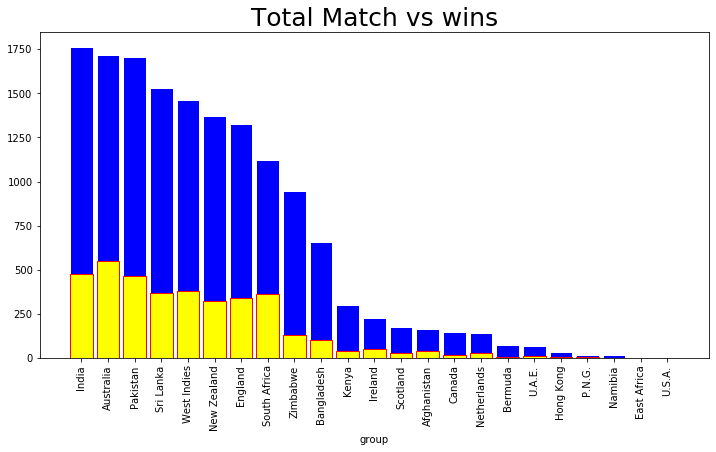

In [18]:
barWidth = 0.85
plt.subplots(figsize=(12,6))
plt.bar(matches_played_byteams.index, matches_played_byteams['Total Matches'], color='blue', edgecolor='white', width=barWidth)
plt.bar(matches_played_byteams.index, matches_played_byteams['wins'], color='yellow', edgecolor='red', width=barWidth)
plt.xticks(matches_played_byteams.index, matches_played_byteams.index,rotation='vertical')
plt.xlabel("group")
plt.title('Total Match vs wins',size=25)
plt.show()  

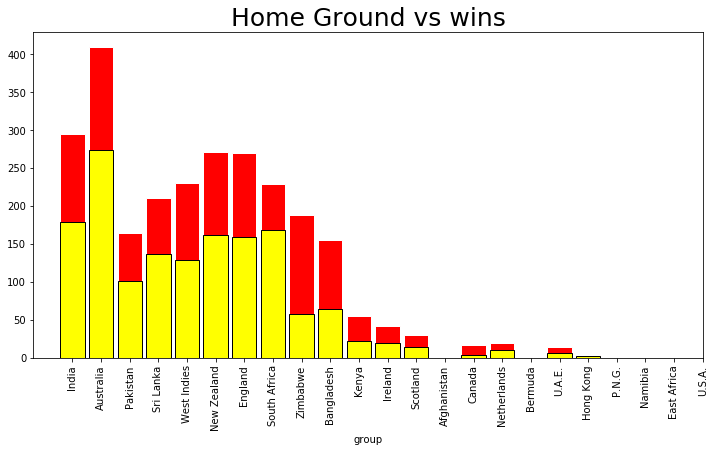

In [19]:
barWidth = 0.85
plt.subplots(figsize=(12,6))
plt.bar(matches_played_byteams.index, matches_played_byteams['HomeTotal'], color='red', edgecolor='white', width=barWidth)
plt.bar(matches_played_byteams.index, matches_played_byteams['HomeWin'], color='yellow', edgecolor='black', width=barWidth)
plt.xticks(matches_played_byteams.index, matches_played_byteams.index,rotation='vertical')
plt.xlabel("group")
plt.title('Home Ground vs wins',size=25)
plt.show() 

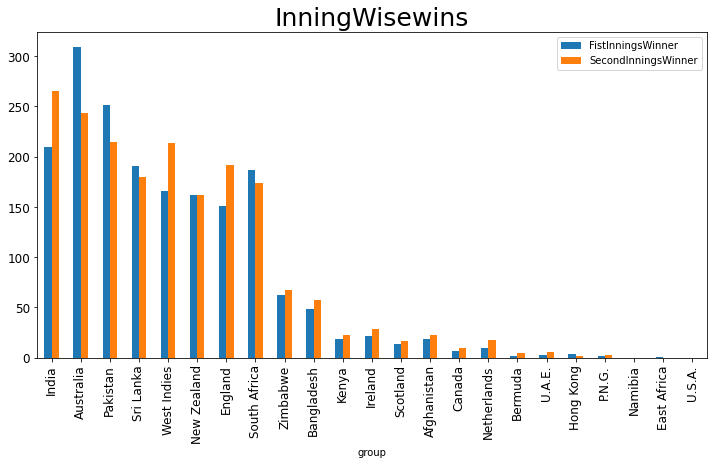

In [16]:
s=matches_played_byteams[['FistInningsWinner','SecondInningsWinner']].plot(kind="bar",figsize=(12,6),fontsize=12) 
plt.xlabel("group")
plt.title('InningWisewins',size=25)
plt.legend(loc = 'upper right')
plt.show()

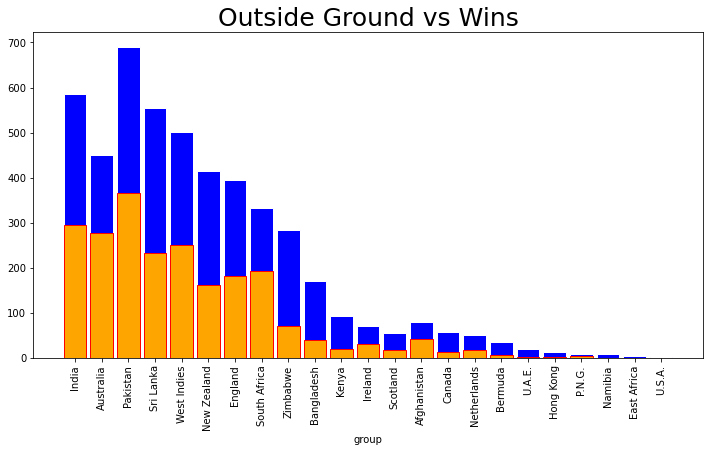

In [20]:
barWidth = 0.85
plt.subplots(figsize=(12,6))
plt.bar(matches_played_byteams.index, matches_played_byteams['AwayTotal'], color='blue', edgecolor='white', width=barWidth)
plt.bar(matches_played_byteams.index, matches_played_byteams['AwayWin'], color='orange', edgecolor='red', width=barWidth)
plt.xticks(matches_played_byteams.index, matches_played_byteams.index,rotation='vertical')
plt.xlabel("group")
plt.title('Outside Ground vs Wins',size=25)
plt.show() 

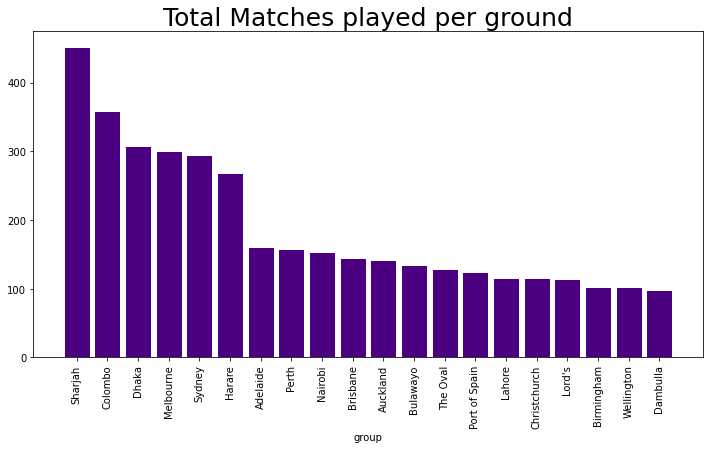

In [21]:
DFGrounds=Continuous['Ground'].value_counts().reset_index()
DFGrounds.columns=['Ground','Total Matches']
DFGrounds = DFGrounds.sort_values(by ='Total Matches', ascending = False)[:20]
DFGrounds.set_index('Ground',inplace=True)
barWidth = 0.85
plt.subplots(figsize=(12,6))
plt.bar(DFGrounds.index, DFGrounds['Total Matches'], color='indigo', edgecolor='white', width=barWidth)
plt.xticks(rotation='vertical')
plt.xlabel("group")
plt.title('Total Matches played per ground',size=25)
plt.show()

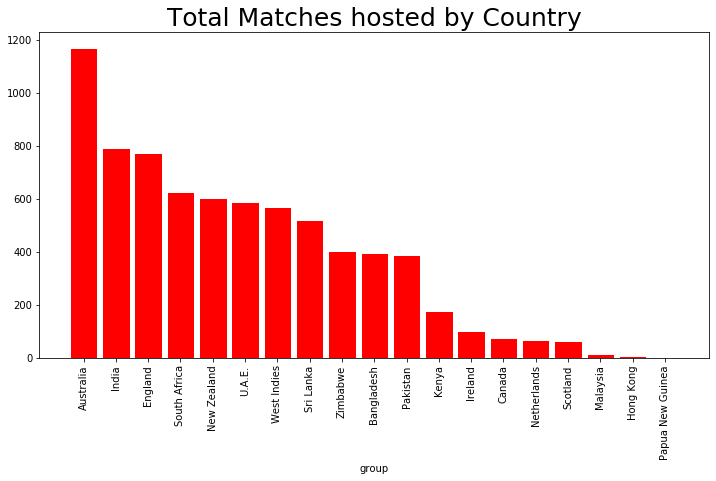

In [20]:
HostCountry=Continuous['Host_Country'].value_counts().reset_index()
HostCountry.columns=['Host_Country','Total Matches']
HostCountry = HostCountry.sort_values(by ='Total Matches', ascending = False)
HostCountry.set_index('Host_Country',inplace=True)
barWidth = 0.85
plt.subplots(figsize=(12,6))
plt.bar(HostCountry.index, HostCountry['Total Matches'], color='red', edgecolor='white', width=barWidth)
plt.xticks(rotation='vertical')
plt.xlabel("group")
plt.title('Total Matches hosted by Country',size=25)
plt.show()

      Total Matches
Year               
2007            360
2006            308
1999            290
2009            286
2003            282
2015            282
2010            280
2011            280
2002            274
2000            254
2013            248
1996            244
2004            244
2001            238
2014            236
2008            232
2017            224
1997            214
1998            212
2005            188
1994            188
2016            182
2012            168
1992            168
1993            154
1987            146
1983            128
1985            124
1988            120
1986            118
1995            118
1990            118
1989            106
1984             92
1991             74
1982             64
1981             54
1979             50
1980             42
1975             34
1978             18
1976             12
1974             12
1977             12
1973              8
1972              6
1971              2


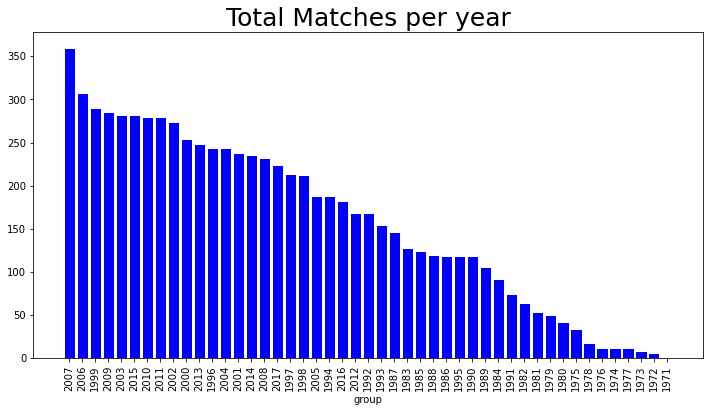

In [25]:
Year=Continuous['Year'].value_counts().sort_values( ascending= False ).reset_index()
Year.columns=['Year','Total Matches']
Year.set_index('Year',inplace=True)
print(Year)
barWidth = 0.85
plt.subplots(figsize=(12,6))
plt.bar(Year.index, Year['Total Matches'], color='blue', edgecolor='white', width=barWidth)
plt.xticks(Year.index, Year.index,rotation='vertical')
plt.xlabel("group")
plt.title('Total Matches per year',size=25)
plt.show() 

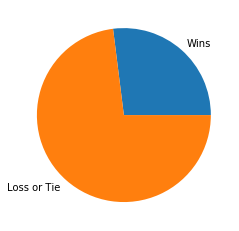

In [22]:
k = np.array([475,1285])
mylables = ["Wins","Loss or Tie"]

plt.pie(k, labels= mylables)
plt.show()